In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data in and take a look at it
data = pd.read_csv("OnlineNewsPopularity.csv")

data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
#Check the number of rows and column of the data
data.shape

(39644, 61)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

There does not appear to be missing values in the dataset, which is great.

In [5]:
#The columns appear to have a space at the beginning of the name, let's remove that
data.columns = data.columns.str.replace(" ", "")

In [6]:
#Remove the two descriptive variables which are not used for prediction
data.drop(["url", "timedelta"], axis = 1, inplace = True)

Text(0.5, 1.0, 'Heatmap Showing the Correlation Between Variables')

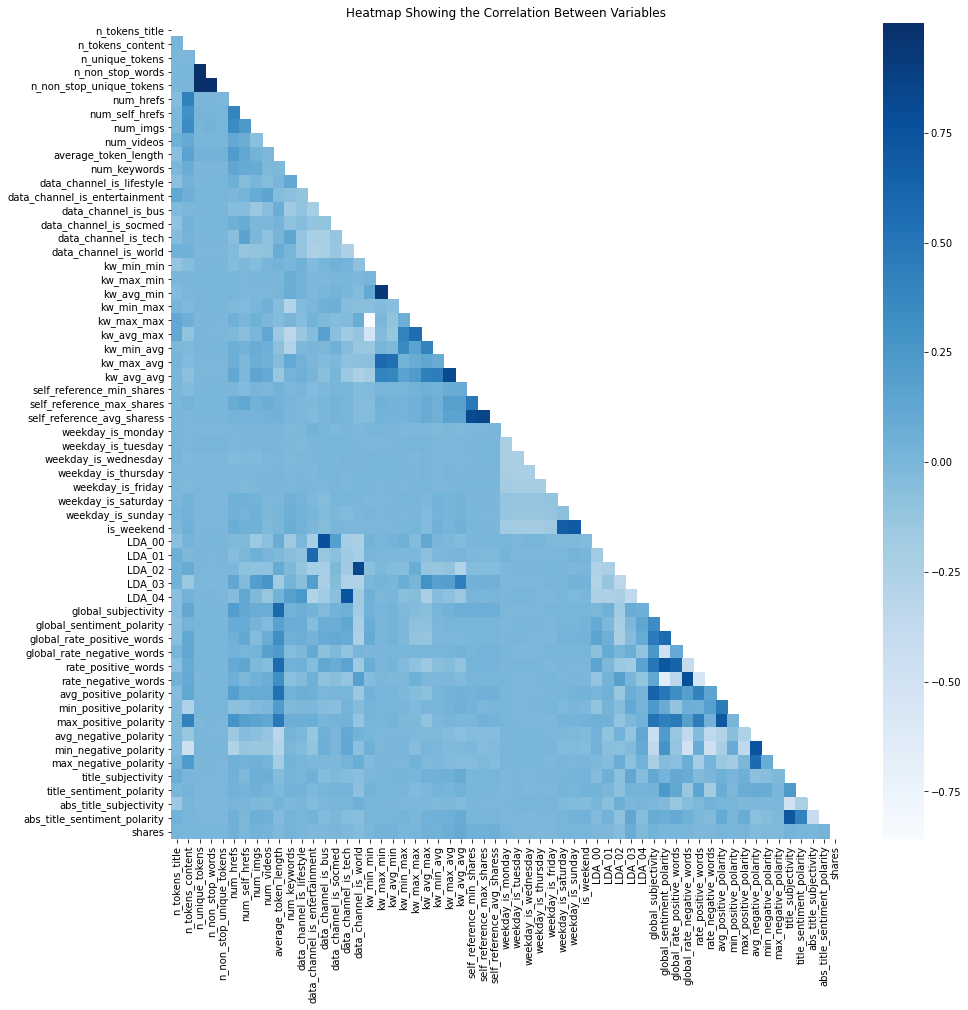

In [7]:
#Heatmap showing the correlation between variables
data_correlation = data.corr()
plt.figure(figsize = (15, 15))
mask = np.triu(np.ones_like(data_correlation, dtype=bool))
sns.heatmap(data_correlation, mask = mask, cmap = "Blues")
plt.title("Heatmap Showing the Correlation Between Variables")

In [8]:
#The columns "n_non_stop_words", "n_non_stop_unique_tokens", "kw_avg_min", as these show high correlation with other variables
data.drop(["n_non_stop_words", "n_non_stop_unique_tokens", "kw_avg_min"], axis = 1, inplace = True)

In [9]:
data.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,8.000000,3.000000,1.000000,0.000000,4.664082,7.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,14.000000,4.000000,4.000000,1.000000,4.854839,9.000000,0.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,304.000000,116.000000,128.000000,91.000000,8.041534,10.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


The minimum value for the column "n_tokens_content" is 0. This column represents the number of words in the document. It does not benefit our analysis to include data on articles with no content, so we will remove them.

In [10]:
data_with_words = data[data["n_tokens_content"] > 0]
data_with_words.reset_index(inplace = True, drop = True)
data_with_words.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,...,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000
mean,10.382419,563.295375,0.565049,11.217872,3.394769,4.563061,1.263786,4.687892,7.215012,0.054000,...,0.098376,0.779963,-0.267493,-0.537970,-0.110801,0.280573,0.070997,0.342431,0.154930,3355.360398
std,2.113800,468.299538,3.573022,11.340580,3.869773,8.295365,4.164896,0.283231,1.916459,0.226021,...,0.070382,0.212509,0.121174,0.279703,0.094919,0.323561,0.264338,0.188606,0.225636,11585.968776
min,2.000000,18.000000,0.114964,0.000000,0.000000,0.000000,0.000000,3.600000,1.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,259.000000,0.477419,5.000000,1.000000,1.000000,0.000000,4.496250,6.000000,0.000000,...,0.050000,0.600000,-0.331532,-0.714286,-0.125000,0.000000,0.000000,0.166667,0.000000,945.000000
50%,10.000000,423.000000,0.542986,8.000000,3.000000,1.000000,0.000000,4.674121,7.000000,0.000000,...,0.100000,0.800000,-0.257738,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,729.000000,0.611111,14.000000,4.000000,4.000000,1.000000,4.861901,9.000000,0.000000,...,0.100000,1.000000,-0.193415,-0.312500,-0.050000,0.500000,0.136364,0.500000,0.250000,2700.000000
max,23.000000,8474.000000,701.000000,304.000000,116.000000,128.000000,91.000000,8.041534,10.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [12]:
min_shares = data_with_words["shares"].min() - 1
shares_20 = data_with_words["shares"].quantile(.20)
shares_40 = data_with_words["shares"].quantile(.40)
shares_60 = data_with_words["shares"].quantile(.60)
shares_80 = data_with_words["shares"].quantile(.80)
shares_90 = data_with_words["shares"].quantile(.90)
max_shares = data_with_words["shares"].max() + 1

popularity = pd.cut(data_with_words["shares"], bins = [min_shares, shares_20, shares_40, shares_60, shares_80, 
                                                       shares_90, max_shares], 
       labels = ["Very Low", "Low", "Medium", "High", "Very High", "Exceptional"])

data_with_words["Popularity"] = popularity

<ipython-input-12-399b13053606>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_words["Popularity"] = popularity


In [13]:
data_with_words.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity
0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Very Low
1,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Very Low
2,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Medium
3,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Low
4,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Very Low


Text(0.5, 1.0, 'Histogram of Number of Shares for Articles With Less than 10,000 Shares')

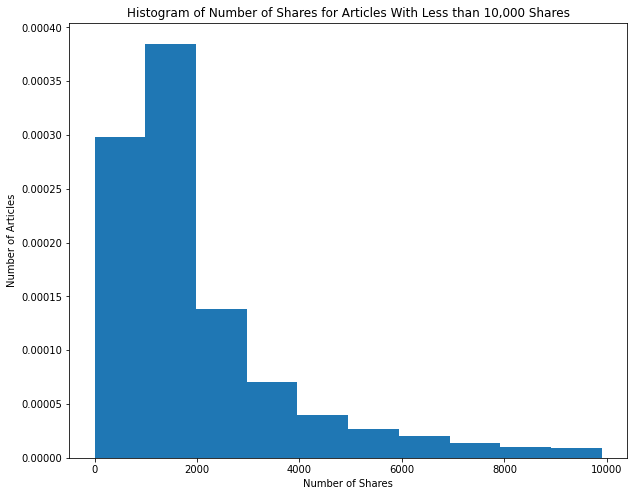

In [16]:
plt.figure(figsize = (10, 8))
plt.hist(data_with_words[data_with_words["shares"] < 10000]["shares"], density = True)#, range = (0, 550000))
plt.xlabel("Number of Shares")
plt.ylabel("Number of Articles")
plt.title("Histogram of Number of Shares for Articles With Less than 10,000 Shares")

In [17]:
shares_skew = data_with_words["shares"].skew()
shares_kurtosis = data_with_words["shares"].kurt()

print("The skew of the distribution of shares is %s, and the kurtosis is %s." %(shares_skew, shares_kurtosis))

The skew of the distribution of shares is 34.952836253385335, and the kurtosis is 1909.9752124036713.


In [18]:
days= ["weekday_is_monday", "weekday_is_tuesday", "weekday_is_wednesday", "weekday_is_thursday", "weekday_is_friday",
      "weekday_is_saturday", "weekday_is_sunday"]
pd.DataFrame(data_with_words.groupby("Popularity")[days].count())
#plt.plot(data_with_words.groupby(""))

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday
Popularity,,,,,,,
Very Low,7711,7711,7711,7711,7711,7711,7711
Low,8597,8597,8597,8597,8597,8597,8597
Medium,7489,7489,7489,7489,7489,7489,7489
High,7180,7180,7180,7180,7180,7180,7180
Very High,3649,3649,3649,3649,3649,3649,3649
Exceptional,3837,3837,3837,3837,3837,3837,3837


In [19]:
data_with_words["day_of_week"] = data_with_words[days].eq(1).idxmax(axis=1)
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

day_dictionary = {}
for i in range(len(days)):
    day_dictionary[days[i]] = weekdays[i]

data_with_words["day_of_week"] = data_with_words["day_of_week"].map(day_dictionary)

<ipython-input-19-321f3ded23b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_words["day_of_week"] = data_with_words[days].eq(1).idxmax(axis=1)
<ipython-input-19-321f3ded23b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_words["day_of_week"] = data_with_words["day_of_week"].map(day_dictionary)


In [24]:
data_channels = ["data_channel_is_lifestyle", "data_channel_is_entertainment", "data_channel_is_bus",
                 "data_channel_is_socmed", "data_channel_is_tech", "data_channel_is_world"]
data_with_words["data_channel"] = data_with_words[data_channels].eq(1).idxmax(axis=1)
channels = ["Lifestyle", "Entertainment", "Business", "Social Media", "Tech", "World"]

channels_dictionary= {}
for i in range(len(data_channels)):
    channels_dictionary[data_channels[i]] = channels[i]
data_with_words["data_channel"] = data_with_words["data_channel"].map(channels_dictionary)

<ipython-input-24-a95ce5b31ff5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_words["data_channel"] = data_with_words[data_channels].eq(1).idxmax(axis=1)
<ipython-input-24-a95ce5b31ff5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_words["data_channel"] = data_with_words["data_channel"].map(channels_dictionary)


Text(0.5, 1.0, 'Number of Articles by Popularity Category and Weekday Published')

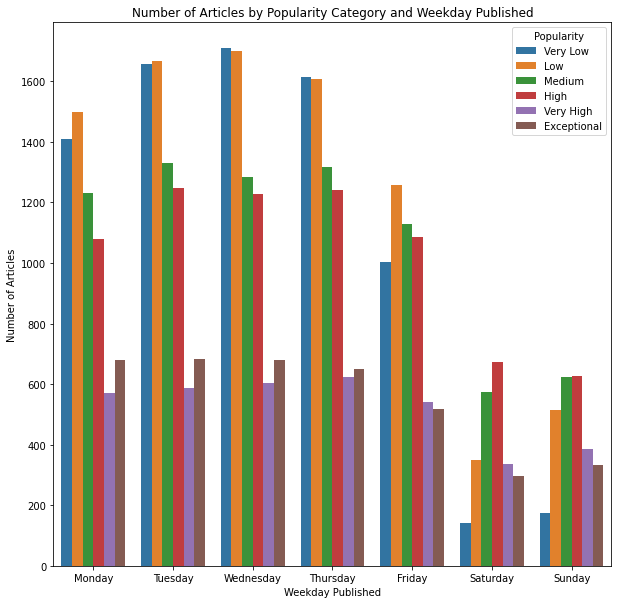

In [20]:
plt.figure(figsize = (10, 10))
g = sns.countplot(x = "day_of_week", hue = "Popularity", data = data_with_words)
plt.xlabel("Weekday Published")
plt.ylabel("Number of Articles")
plt.title("Number of Articles by Popularity Category and Weekday Published")